# AIP2 Lab 04 - NumPy(Try friendly with ~)

## The Basis of NumPy Arrays

### 1. Array Indexing

If you are familiar with Python's standard list indexing, indexing in NumPy will feel quite familiar.
In a one-dimensional array, the $i^{th}$ value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [1]:
import numpy as np

arr = np.arange(10, dtype=np.int64)
print(arr)
print("dimension: ", arr.ndim)
print("shape: ", arr.shape)

[0 1 2 3 4 5 6 7 8 9]
dimension:  1
shape:  (10,)


In [2]:
print(arr[8])
arr[-1], arr[5]   # to index from the end of the array, use negative indices

8


(9, 5)

In [3]:
arr = np.array([[1,2,3,4],
               [5,6,7,8],
               [9,10,11,12]])
print(arr)
print("dimension: ", arr.ndim)
print("shape: ", arr.shape)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
dimension:  2
shape:  (3, 4)


In [4]:
arr[2], arr[1]  # In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices

(array([ 9, 10, 11, 12]), array([5, 6, 7, 8]))

In [0]:
arr[2,2] = 0   # values can be modified using any of the above index notation
arr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10,  0, 12]])

In [0]:
arr[2,-1] = 0.12 # will be truncated... 
arr              # Unlike Python list, NumPy arrays have a fixed type. Keep in mind~~

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10,  0,  0]])

In [0]:
# multiple slices separated by commas
arr[:2, :2]  # two rows, two columns

array([[1, 2],
       [5, 6]])

In [0]:
arr[:2, ::2]  # all rows, every other column

array([[1, 3],
       [5, 7]])

In [0]:
arr[::-1, ::-1]  # can be reversed together

array([[ 0,  0, 10,  9],
       [ 8,  7,  6,  5],
       [ 4,  3,  2,  1]])

In [0]:
arr[0]  # == arr[0,:] , the empty slice can be omitted

array([1, 2, 3, 4])

### 2. Copies of arrays

This is useful to instead explicitly copy the data within an array. This can be most easily done with the ``copy()`` method:

In [0]:
copy_arr = arr[:2, :2].copy()
copy_arr

array([[1, 2],
       [5, 6]])

In [0]:
copy_arr[0,0] = 33
copy_arr

array([[33,  2],
       [ 5,  6]])

In [0]:
arr                       # If we now modify this subarray, the original array is not changed. 

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10,  0,  0]])

### 3. Reshaping of arrays

   Another useful type of operation is reshaping of arrays.
    The most flexible way of doing this is with the ``reshape`` method.
    For example, if you want to put the numbers 1 through 9 in a <b> $3 \times 3$ grid</b>, you can do the following:

In [0]:
arr = np.arange(1,10,1, dtype=np.int64).reshape(3,3)
print(arr)
print("dimension: ",arr.ndim)
print("shape: ",arr.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
dimension:  2
shape:  (3, 3)


Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix.
This can be done with the ``reshape`` method, or more easily done by making use of the ``newaxis`` keyword within a slice operation:

In [0]:
arr = np.array([1,2,3])
arr.reshape((1,3))  # row vector by shape

array([[1, 2, 3]])

In [0]:
arr[np.newaxis, :]  # row vector by newaxis

array([[1, 2, 3]])

In [0]:
arr.reshape((3,1))  # column vector by shape
arr[: , np.newaxis] # column vector by newaxis

array([[1],
       [2],
       [3]])

### 4. Concatenation and Splitting

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines ``np.concatenate``, ``np.vstack``, and ``np.hstack``.
``np.concatenate`` takes a tuple or list of arrays as its first argument, as we can see here:

In [5]:
arr1 = np.arange(1, 5, 2)
arr2 = np.arange(2, 6, 2)
print(arr1, arr2)

[1 3] [2 4]


In [0]:
arr3 = np.concatenate([arr1, arr2])  # can concatenate more than two arrays at once
print(arr3)
print(np.concatenate([arr1, arr2, arr3]))

[1 3 2 4]
[1 3 2 4 1 3 2 4]


In [0]:
arr4 = arr3.reshape((2,2)) 
arr4

array([[1, 3],
       [2, 4]])

In [0]:
arr5 = np.concatenate([arr4,arr4])  # along the first axis
print(arr5)
print(arr5.shape)

[[1 3]
 [2 4]
 [1 3]
 [2 4]]
(4, 2)


In [0]:
arr6 = np.concatenate([arr4,arr4], axis = 1)  # zero-indexed 
print(arr6)
print(arr6.shape)

[[1 3 1 3]
 [2 4 2 4]]
(2, 4)


<b><r> The opposite of concatenation is splitting</r></b>, which is implemented by the functions ``np.split``, ``np.hsplit``, and ``np.vsplit``.  For each of these, we can pass a list of indices giving the split points:

In [0]:
arr7 = np.arange(1, 10, 1)
arr7

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
arr1, arr2, arr3 = np.split(arr7, 3)
print(arr1, arr2, arr3)

[1 2 3] [4 5 6] [7 8 9]


### 5. Array Arithmetic operation 

The standard addition, subtraction, multiplication, and division can all be used:

In [0]:
arr = np.arange(4)
print(arr, arr.shape)
print("arr     =", arr)
print("arr + 5 =", arr + 5)
print("arr - 5 =", arr - 5)
print("arr * 2 =", arr * 2)
print("arr / 2 =", arr / 2)
print("arr // 2 =", arr // 2)  # floor division
print("-arr     = ", -arr)
print("arr ** 2 = ", arr ** 2)
print("arr % 2  = ", arr % 2)

[0 1 2 3] (4,)
arr     = [0 1 2 3]
arr + 5 = [5 6 7 8]
arr - 5 = [-5 -4 -3 -2]
arr * 2 = [0 2 4 6]
arr / 2 = [0.  0.5 1.  1.5]
arr // 2 = [0 0 1 1]
-arr     =  [ 0 -1 -2 -3]
arr ** 2 =  [0 1 4 9]
arr % 2  =  [0 1 0 1]


Each of these arithmetic operations are simply convenient wrappers around specific functions built into NumPy; for example, the ``+`` operator is a wrapper for the ``add`` function:

In [0]:
arr1 = np.add(arr, 2)
arr1

array([2, 3, 4, 5])

The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|


In [0]:
# Exponents and logarithms :: 지수와 로그
arr = np.arange(4)
print("arr     =", arr)
print("e^arr  =", np.exp(arr))
print("2^arr   =", np.exp2(arr))
print("3^arr   =", np.power(3, arr))

arr     = [0 1 2 3]
e^arr  = [ 1.          2.71828183  7.3890561  20.08553692]
2^arr   = [1. 2. 4. 8.]
3^arr   = [ 1  3  9 27]


### 6. Aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |


### 7. Broadcasting Practice

### 8. Visualize of data (using Matplotlib package)

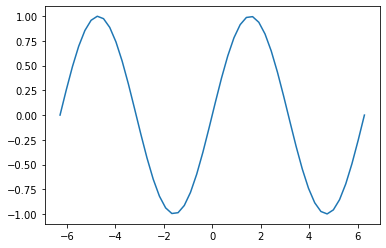

In [40]:
# Thanks for your attention!
import numpy as np
import matplotlib.pyplot as plt
b = np.linspace(-2*np.pi,2*np.pi, 50)
a = np.sin(b)
plt.plot(b,a)
plt.show()